In [ ]:
from pycoingecko import CoinGeckoAPI
from datetime import datetime

cg = CoinGeckoAPI(api_key='')

In [2]:
import pandas as pd
cg_coin_list = pd.DataFrame.from_records(cg.get_coins_list())

     Datetime     close          mcap         volume
0  2025-01-02  2.718096  3.895746e+06  179019.978302
1  2025-01-03  2.589467  3.703962e+06  174613.918566
2  2025-01-04  2.781358  3.986788e+06   65635.010696
3  2025-01-05  2.590319  3.713179e+06  100443.483722
4  2025-01-06  2.449580  3.552287e+06   87128.284648
..        ...       ...           ...            ...
94 2025-04-06  0.118325  6.330564e+05    3200.509540
95 2025-04-07  0.098923  5.315959e+05    5030.190335
96 2025-04-08  0.090686  4.883230e+05   16990.908908
97 2025-04-09  0.078041  4.178380e+05    7693.221131
98 2025-04-10  0.086367  4.634850e+05    8176.080771

[99 rows x 4 columns]


dict_keys(['prices', 'market_caps', 'total_volumes'])

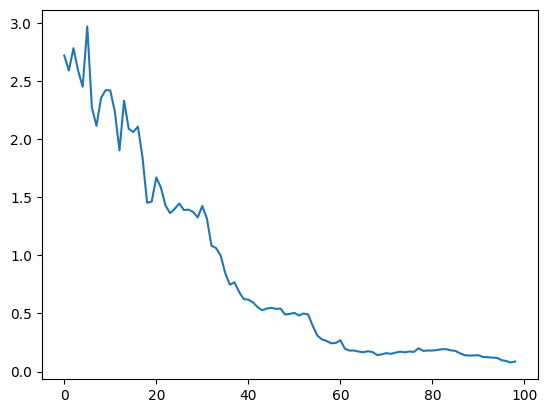

In [3]:
# history = cg.get_coin_market_chart_by_id('pokpok-golden-egg', 'usd', 'max')

# history.keys()
start_date = datetime(2025, 1, 1)
end_date = datetime(2025, 4, 10)
# Convert to Unix timestamps
from_timestamp = int(start_date.timestamp())
to_timestamp = int(end_date.timestamp())
history = cg.get_coin_market_chart_range_by_id(
    'pokpok-golden-egg', 'usd', from_timestamp=from_timestamp, to_timestamp=to_timestamp
    )
# Convert each key to a DataFrame
prices_df = pd.DataFrame(history["prices"], columns=["Datetime", "close"])
market_caps_df = pd.DataFrame(history["market_caps"], columns=["Datetime", "mcap"])
total_volumes_df = pd.DataFrame(history["total_volumes"], columns=["Datetime", "volume"])

# Merge all DataFrames on the "Datetime" column
merged_df = prices_df.merge(market_caps_df, on="Datetime").merge(total_volumes_df, on="Datetime")

# Convert the "Datetime" column from milliseconds to a readable datetime format
merged_df["Datetime"] = pd.to_datetime(merged_df["Datetime"], unit="ms")

# Display the resulting DataFrame
print(merged_df)
merged_df.close.plot()
history.keys()

<Axes: >

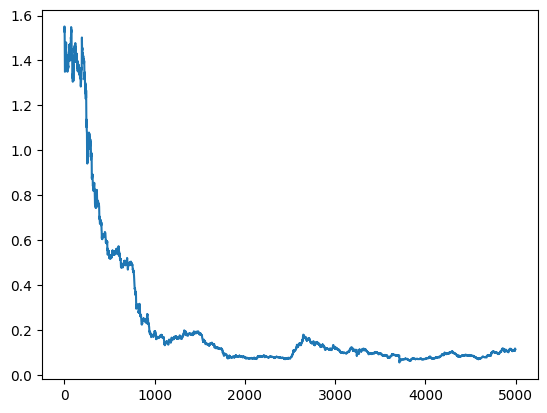

In [40]:
from source.code.coingecko import get_price_history_v2
from source.code.settings import source_settings

res = get_price_history_v2('pokpok-golden-egg', 5000, source_settings.get('coingecko').get('1 hour'))
res.close.plot()

In [5]:
# pd.DataFrame.from_records(cg.get_coins_list())

In [6]:
# markets = pd.DataFrame.from_records(cg.get_coins_markets(vs_currency='usd'))
# categories = pd.DataFrame.from_records(cg.get_coins_categories())

# history = cg.get_coin_ohlc_by_id('pokpok-golden-egg', 'usd', days=90)
# pd.DataFrame.from_records(history, columns=['Datetime', 'Open', 'High', 'Low', 'Close'])

In [7]:
# import source.code.coingecko as cg

# products = cg.get_all_products()
# products.roi = products.roi

In [8]:
import math

def f(x: int, y: int) -> float:
    """
    Calculate the fitness function value for given x and y.

    :param x: Integer input in [0, 1023]
    :param y: Integer input in [0, 1023]
    :return: Fitness value as a float
    """
    term1 = abs(0.2 * x * math.sin(x + y))
    term2 = abs((x + y) * math.cos(y ** 2) / 10)
    return term1 + term2

# Example:
fitness = f(100, 40)
print(fitness)

27.981881681936407


In [9]:
fitness_values = [29.176346,
7.362679,
1.386577,
61.256061,
206.558638,
96.791633,
16.076571,
9.336979,
68.072526,
41.567432
]
total_fitness = sum(fitness_values)
prob_3_5 = 1.386577 / total_fitness
prob_3_5

0.0025792681342736213

In [10]:
import random
from typing import Tuple

def one_point_crossover_ints(a: int, b: int, bit_width: int = 10, split_index: int = None) -> Tuple[int, int]:
    """
    Perform one-point crossover between two integers using binary representation.
    
    :param a: First parent integer
    :param b: Second parent integer
    :param bit_width: Bit width used for binary encoding (default is 10)
    :param split_index: Optional split index for crossover; if None, chosen randomly in [1, bit_width-1]
    :return: Tuple of child integers resulting from crossover
    """
    def to_bin(n: int) -> str:
        return format(n, f'0{bit_width}b')

    def from_bin(b: str) -> int:
        return int(b, 2)

    if split_index is None:
        split_index = random.randint(1, bit_width - 1)

    a_bin = to_bin(a)
    b_bin = to_bin(b)

    child1_bin = a_bin[:split_index] + b_bin[split_index:]
    child2_bin = b_bin[:split_index] + a_bin[split_index:]

    return from_bin(child1_bin), from_bin(child2_bin)


one_point_crossover_ints(456, 18, 10)
one_point_crossover_ints(903, 61, 10)


(903, 61)

In [11]:
from typing import Dict, List, Optional

def backtracking_map_coloring(graph: Dict[str, List[str]],
                               colors: List[int],
                               unary_constraints: Dict[str, List[int]]) -> int:
    """
    Solve map coloring CSP using backtracking search.

    :param graph: Adjacency list of the map graph
    :param colors: List of available colors (domain)
    :param unary_constraints: Dict of variables with forbidden colors
    :return: Number of consistent assignment steps to find a complete solution
    """
    variables = sorted(graph.keys())
    assignment = {}
    step_count = 0

    def is_consistent(var: str, val: int) -> bool:
        if val in unary_constraints.get(var, []):
            return False
        for neighbor in graph[var]:
            if neighbor in assignment and assignment[neighbor] == val:
                return False
        return True

    def backtrack(index: int) -> Optional[Dict[str, int]]:
        nonlocal step_count
        if index == len(variables):
            return assignment.copy()
        
        var = variables[index]
        for val in colors:
            if is_consistent(var, val):
                assignment[var] = val
                step_count += 1
                print(f"Step {step_count}: {var} = {val}")  # Add this line
                result = backtrack(index + 1)
                if result:
                    return result
                del assignment[var]  # backtrack
        return None

    solution = backtrack(0)
    return step_count


map_coloring_graph = {
    'A': ['D', 'F'],
    'D': ['A', 'F', 'C'],
    'F': ['A', 'D', 'C'],
    'C': ['D', 'F', 'E', 'G'],
    'E': ['C', 'G', 'B'],
    'G': ['C', 'E', 'B'],
    'B': ['E', 'G']
}

unary_constraints = {
    'A': [1],
    'C': [1]
}

colors = [1, 2, 3]

steps = backtracking_map_coloring(map_coloring_graph, colors, unary_constraints)
print("Steps:", steps)


Step 1: A = 2
Step 2: B = 1
Step 3: C = 2
Step 4: D = 1
Step 5: E = 3
Step 6: F = 3
Step 7: D = 3
Step 8: E = 3
Step 9: F = 1
Step 10: C = 3
Step 11: D = 1
Step 12: E = 2
Step 13: B = 2
Step 14: C = 2
Step 15: D = 1
Step 16: E = 1
Step 17: F = 3
Step 18: G = 3
Steps: 18


In [12]:
from typing import Dict, List, Optional, Set, Tuple
import copy

def csp_forward_checking_solver(
    graph: Dict[str, List[str]],
    colors: List[int],
    unary_constraints: Dict[str, List[int]],
    assignment: Optional[Dict[str, int]] = None
    
    ) -> Tuple[int, int, Optional[Dict[str, int]]]:
    """
    Solve a CSP using Backtracking Search with Forward Checking.
    
    :param graph: Map graph as adjacency list
    :param colors: List of possible colors (e.g., [1, 2, 3])
    :param unary_constraints: Dict of variables to forbidden values
    :return: (steps, values_removed, final_assignment)
    """
    variables = sorted(graph.keys())
    if assignment is None:
        assignment = {}
    step_count = 0
    value_removal_count = 0

    # Initialize domains after applying unary constraints
    initial_domains: Dict[str, Set[int]] = {
        var: set(colors) - set(unary_constraints.get(var, [])) for var in variables
    }

    def forward_check(domains: Dict[str, Set[int]], var: str, value: int) -> Tuple[bool, Dict[str, Set[int]], int]:
        """
        Perform forward checking: remove inconsistent values from neighbors.
        :return: (is_valid, new_domains, removed_value_count)
        """
        new_domains = copy.deepcopy(domains)
        removed = 0
        for neighbor in graph[var]:
            if neighbor in assignment:
                continue
            if value in new_domains[neighbor]:
                new_domains[neighbor].remove(value)
                removed += 1
                if not new_domains[neighbor]:
                    return False, new_domains, removed
        return True, new_domains, removed

    def backtrack(domains: Dict[str, Set[int]], index: int) -> Optional[Dict[str, int]]:
        nonlocal step_count, value_removal_count
        if index == len(variables):
            return assignment.copy()

        var = variables[index]
        for val in sorted(domains[var]):
            # Check local consistency
            if all(assignment.get(n) != val for n in graph[var]):
                assignment[var] = val
                step_count += 1

                # Forward checking
                valid, new_domains, removed = forward_check(domains, var, val)
                value_removal_count += removed

                if valid:
                    result = backtrack(new_domains, index + 1)
                    if result:
                        return result

                del assignment[var]  # backtrack
        return None

    result = backtrack(initial_domains, 0)
    return step_count, value_removal_count, result

map_coloring_graph = {
    'A': ['D', 'F'],
    'D': ['A', 'F', 'C'],
    'F': ['A', 'D', 'C'],
    'C': ['D', 'F', 'E', 'G'],
    'E': ['C', 'G', 'B'],
    'G': ['C', 'E', 'B'],
    'B': ['E', 'G']
}

unary_constraints = {
    'A': [1],
    'C': [1],
}

colors = [1, 2, 3]

steps, values_removed, solution = csp_forward_checking_solver(map_coloring_graph, colors, unary_constraints, assignment={'D': 3})


print(f"Steps: {steps}")
print(f"Values removed by FC: {values_removed}")
print(f"Solution: {solution}")


Steps: 15
Values removed by FC: 19
Solution: {'A': 2, 'B': 2, 'C': 2, 'D': 1, 'E': 1, 'F': 3, 'G': 3}


In [13]:
from typing import Dict, List, Set, Tuple
from collections import deque
import copy

def ac3(graph: Dict[str, List[str]],
        colors: List[int],
        unary_constraints: Dict[str, List[int]]) -> Tuple[Dict[str, Set[int]], int]:
    """
    Apply the AC-3 algorithm to enforce arc consistency on a CSP.

    :param graph: Map as an adjacency list.
    :param colors: List of possible color values (domain).
    :param unary_constraints: Unary constraints (e.g., {'A': [1]}).
    :return: Tuple of (domains, values_removed)
    """
    # Step 1: Initialize domains (applying unary constraints)
    domains: Dict[str, Set[int]] = {
        var: set(colors) - set(unary_constraints.get(var, [])) for var in graph
    }

    # Step 2: Initialize queue of all arcs (as directed pairs)
    queue = deque((xi, xj) for xi in graph for xj in graph[xi])
    removed_count = 0

    def revise(xi: str, xj: str) -> bool:
        """
        Make xi arc-consistent with xj.
        :return: True if any value was removed from xi's domain.
        """
        nonlocal removed_count
        revised = False
        to_remove = set()
        for val in domains[xi]:
            if not any(val != other for other in domains[xj]):
                to_remove.add(val)
        if to_remove:
            domains[xi] -= to_remove
            removed_count += len(to_remove)
            revised = True
        return revised

    # Step 3: AC-3 main loop
    while queue:
        xi, xj = queue.popleft()
        if revise(xi, xj):
            if not domains[xi]:
                return domains, removed_count  # CSP is unsatisfiable
            for xk in graph[xi]:
                if xk != xj:
                    queue.append((xk, xi))

    return domains, removed_count
map_coloring_graph = {
    'A': ['D', 'F'],
    'D': ['A', 'F', 'C'],
    'F': ['A', 'D', 'C'],
    'C': ['D', 'F', 'E', 'G'],
    'E': ['C', 'G', 'B'],
    'G': ['C', 'E', 'B'],
    'B': ['E', 'G']
}

steps, values_removed, solution = csp_forward_checking_solver(
    map_coloring_graph,
    colors=[1, 2, 3],
    unary_constraints={'A': [1], 'C': [1]}
)

print("Steps:", steps)
print("Values removed by FC:", values_removed)
print("Solution:", solution)


Steps: 15
Values removed by FC: 19
Solution: {'A': 2, 'B': 2, 'C': 2, 'D': 1, 'E': 1, 'F': 3, 'G': 3}


In [14]:
from typing import Dict, List, Optional, Set, Tuple
from collections import deque
import copy

# Re-define the input graph and constraints after reset
map_coloring_graph = {
    'A': ['D', 'F'],
    'D': ['A', 'F', 'C'],
    'F': ['A', 'D', 'C'],
    'C': ['D', 'F', 'E', 'G'],
    'E': ['C', 'G', 'B'],
    'G': ['C', 'E', 'B'],
    'B': ['E', 'G']
}

unary_constraints = {
    'A': [1],
    'C': [1]
}

colors = [1, 2, 3]

# AC-3 component for MAC
def ac3_domains(domains: Dict[str, Set[int]], graph: Dict[str, List[str]]) -> Tuple[bool, int]:
    queue = deque((xi, xj) for xi in graph for xj in graph[xi])
    removed_count = 0

    def revise(xi: str, xj: str) -> bool:
        nonlocal removed_count
        revised = False
        to_remove = set()
        for val in domains[xi]:
            if not any(val != other for other in domains[xj]):
                to_remove.add(val)
        if to_remove:
            domains[xi] -= to_remove
            removed_count += len(to_remove)
            revised = True
        return revised

    while queue:
        xi, xj = queue.popleft()
        if revise(xi, xj):
            if not domains[xi]:
                return False, removed_count
            for xk in graph[xi]:
                if xk != xj:
                    queue.append((xk, xi))
    return True, removed_count

# MAC-enhanced CSP solver
def csp_mac_solver(graph: Dict[str, List[str]],
                   colors: List[int],
                   unary_constraints: Dict[str, List[int]]) -> Tuple[int, int, Optional[Dict[str, int]]]:
    variables = sorted(graph.keys())
    assignment = {}
    step_count = 0
    value_removal_count = 0

    initial_domains: Dict[str, Set[int]] = {
        var: set(colors) - set(unary_constraints.get(var, [])) for var in variables
    }

    def backtrack(domains: Dict[str, Set[int]], index: int) -> Optional[Dict[str, int]]:
        nonlocal step_count, value_removal_count
        if index == len(variables):
            return assignment.copy()

        var = variables[index]
        for val in sorted(domains[var]):
            if all(assignment.get(n) != val for n in graph[var]):
                assignment[var] = val
                step_count += 1

                new_domains = copy.deepcopy(domains)
                new_domains[var] = {val}

                # Enforce arc consistency
                consistent, removed = ac3_domains(new_domains, graph)
                value_removal_count += removed

                if consistent:
                    result = backtrack(new_domains, index + 1)
                    if result:
                        return result

                del assignment[var]  # backtrack
        return None

    result = backtrack(initial_domains, 0)
    return step_count, value_removal_count, result

# Run MAC solver
mac_steps, mac_removed, mac_solution = csp_mac_solver(
    map_coloring_graph,
    colors,
    unary_constraints
)

mac_steps, mac_removed, mac_solution


(10, 14, {'A': 2, 'B': 2, 'C': 2, 'D': 1, 'E': 1, 'F': 3, 'G': 3})

In [15]:
# Implement MAC solver with MRV + alphabetical tie-breaker for variable selection
def csp_mac_mrv_solver(graph: Dict[str, List[str]],
                       colors: List[int],
                       unary_constraints: Dict[str, List[int]]) -> Tuple[int, int, Optional[Dict[str, int]]]:
    assignment = {}
    step_count = 0
    value_removal_count = 0

    domains: Dict[str, Set[int]] = {
        var: set(colors) - set(unary_constraints.get(var, [])) for var in graph
    }

    def select_unassigned_variable(domains: Dict[str, Set[int]]) -> Optional[str]:
        unassigned = [v for v in graph if v not in assignment]
        if not unassigned:
            return None
        # Apply MRV + tie-breaker: alphabetical
        return sorted(unassigned, key=lambda v: (len(domains[v]), v))[0]

    def backtrack(domains: Dict[str, Set[int]]) -> Optional[Dict[str, int]]:
        nonlocal step_count, value_removal_count
        if len(assignment) == len(graph):
            return assignment.copy()

        var = select_unassigned_variable(domains)
        for val in sorted(domains[var]):
            if all(assignment.get(n) != val for n in graph[var]):
                assignment[var] = val
                step_count += 1

                new_domains = copy.deepcopy(domains)
                new_domains[var] = {val}

                consistent, removed = ac3_domains(new_domains, graph)
                value_removal_count += removed

                if consistent:
                    result = backtrack(new_domains)
                    if result:
                        return result

                del assignment[var]  # backtrack
        return None

    result = backtrack(domains)
    return step_count, value_removal_count, result

# Run MAC solver with MRV
mac_mrv_steps, mac_mrv_removed, mac_mrv_solution = csp_mac_mrv_solver(
    map_coloring_graph,
    colors,
    unary_constraints
)

mac_mrv_steps, mac_mrv_removed, mac_mrv_solution


(7, 8, {'A': 2, 'C': 2, 'D': 1, 'F': 3, 'E': 1, 'B': 2, 'G': 3})

In [16]:
import math

def expected_score():
    """
    Computes the expected score of dropping a package uniformly over a 40x40 m square target with concentric circles.

    Returns:
        float: Expected score based on area-weighted average.
    """
    # Total area of the square
    square_area = 40 * 40

    # Radii of circles
    r_inner = 5
    r_middle = 10
    r_outer = 20

    # Area of each scoring region
    area_inner = math.pi * r_inner**2                      # 10 points
    area_middle = math.pi * r_middle**2 - area_inner       # 5 points
    area_outer = math.pi * r_outer**2 - area_inner - area_middle  # 1 point
    area_outside = square_area - (area_inner + area_middle + area_outer)  # 0 points

    # Compute expected value as weighted average
    expected = (
        area_inner * 10 +
        area_middle * 5 +
        area_outer * 1 +
        area_outside * 0
    ) / square_area

    return expected

# Compute and print the expected score
expected_score()


1.8162332528565992

In [17]:
import math

def expected_score_rayleigh(sigma=5):
    """
    Computes the expected score under a Rayleigh-distributed landing radius with given sigma.
    
    Args:
        sigma (float): Standard deviation of the 2D Gaussian distribution (assumed same for both axes).
    
    Returns:
        float: Expected score
    """
    def cdf(r):
        return 1 - math.exp(-r**2 / (2 * sigma**2))
    
    # Compute probabilities
    p_inner = cdf(5)
    p_middle = cdf(10) - cdf(5)
    p_outer = cdf(20) - cdf(10)

    # Expected score
    expected = 10 * p_inner + 5 * p_middle + 1 * p_outer
    return expected

print(f"Expected score: {expected_score_rayleigh()}")

Expected score: 6.42567010586248


In [18]:
import numpy as np

def monte_carlo_expected_score(n_samples=1_000_000, sigma=5):
    """
    Approximates the expected score using Monte Carlo sampling from a 2D Gaussian.

    Args:
        n_samples (int): Number of samples to simulate.
        sigma (float): Standard deviation for both X and Y in the 2D Gaussian.

    Returns:
        float: Approximated expected score.
    """
    # Generate X and Y samples from N(0, sigma^2)
    x = np.random.normal(0, sigma, n_samples)
    y = np.random.normal(0, sigma, n_samples)

    # Compute distance from center (Rayleigh distributed)
    r = np.sqrt(x**2 + y**2)

    # Assign scores based on radius
    scores = np.where(r <= 5, 10,
              np.where(r <= 10, 5,
              np.where(r <= 20, 1, 0)))

    # Return the mean score
    return scores.mean()

# Run the simulation
np.random.seed(0)  # for reproducibility
expected_score_mc = monte_carlo_expected_score()
print(f"Monte Carlo Estimated Expected Score: {expected_score_mc}")


Monte Carlo Estimated Expected Score: 6.427233


In [19]:
import math
from scipy.optimize import fsolve

def score_equation(alpha):
    """
    Equation from expected score = 9:
    5 * exp(-25/(2*alpha^2)) + 4 * exp(-50/alpha^2) + 1 * exp(-200/alpha^2) = 1

    Args:
        alpha (float): Standard deviation to solve for.

    Returns:
        float: Residual of the equation.
    """
    term1 = 5 * math.exp(-25 / (2 * alpha**2))
    term2 = 4 * math.exp(-50 / alpha**2)
    term3 = math.exp(-200 / alpha**2)
    return term1 + term2 + term3 - 1

def solve_alpha(initial_guess=2.0):
    """
    Solves for alpha such that the expected score is 9.

    Args:
        initial_guess (float): Starting point for root finding.

    Returns:
        float: Estimated alpha.
    """
    alpha_solution = fsolve(score_equation, initial_guess)[0]
    return alpha_solution

def compute_abc_values(alpha):
    """
    Computes A, B, C, and D in the equation:
    A * exp(-25 / 2α²) + B * exp(-50 / α²) + C * exp(-200 / α²) = D

    Args:
        alpha (float): Solved standard deviation.

    Returns:
        tuple: (A, B, C, D)
    """
    exp1 = math.exp(-25 / (2 * alpha**2))
    exp2 = math.exp(-50 / alpha**2)
    exp3 = math.exp(-200 / alpha**2)

    A = 5
    B = 4
    C = 1
    D = A * exp1 + B * exp2 + C * exp3

    return A, B, C, D

# Run everything
alpha = solve_alpha()
A, B, C, D = compute_abc_values(alpha)

print(f"Solved α: {alpha}")
print(f"A = {A}, B = {B}, C = {C}, D = {D}")


Solved α: 2.7814723996307418
A = 5, B = 4, C = 1, D = 0.9999999999999998


/tmp/ipykernel_190008/2875247434.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  term1 = 5 * math.exp(-25 / (2 * alpha**2))
/tmp/ipykernel_190008/2875247434.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  term2 = 4 * math.exp(-50 / alpha**2)
/tmp/ipykernel_190008/2875247434.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  term3 = math.exp(-200 / alpha**2)


In [20]:
def expected_score_when_both_pull(gt_win_prob=0.6):
    """
    Calculates expected scores for GT and GSU when both teams pull the rope.

    Args:
        gt_win_prob (float): Probability that GT wins when both teams pull.

    Returns:
        tuple: (expected_score_gt, expected_score_gsu)
    """
    gsu_win_prob = 1 - gt_win_prob

    # Outcomes:
    # GT wins → (5, -1)
    # GSU wins → (-1, 5)

    expected_gt = gt_win_prob * 5 + gsu_win_prob * -1
    expected_gsu = gt_win_prob * -1 + gsu_win_prob * 5

    return expected_gt, expected_gsu

# Compute and print expected scores
gt_score, gsu_score = expected_score_when_both_pull()
print(f"Expected score for GT: {gt_score}")
print(f"Expected score for GSU: {gsu_score}")

Expected score for GT: 2.6
Expected score for GSU: 1.4


In [21]:
from sympy import symbols, Eq, solve, Rational

def compute_equilibrium_lg_probability():
    """
    Solves for the equilibrium probability x of choosing Let Go (LG) such that
    a player is indifferent between Pull and LG.

    Returns:
        tuple: (x in reduced Rational form, p + q)
    """
    # Define symbol
    x = symbols('x', rational=True)

    # Expected payoff from Pull: E_Pull = 2*(1 - x)
    # Expected payoff from LG: E_LG = 10*(1 - x) + (-20)*x = 10 - 30x

    # Set expected values equal for indifference
    equation = Eq(2 * (1 - x), 10 - 30 * x)

    # Solve equation
    solution = solve(equation, x)[0]
    solution = Rational(solution).limit_denominator()  # Ensure it's a reduced fraction

    # Extract p + q
    p_plus_q = solution.numerator + solution.denominator

    return solution, p_plus_q

# Run and print result
probability, result = compute_equilibrium_lg_probability()
print(f"Equilibrium probability of LG: {probability} (i.e., p = {probability.numerator}, q = {probability.denominator})")
print(f"Final Answer (p + q): {result}")


Equilibrium probability of LG: 2/7 (i.e., p = 2, q = 7)
Final Answer (p + q): 9


In [22]:
from sympy import symbols, Eq, solve, Rational

def compute_asymmetric_equilibrium():
    """
    Solves for the asymmetric equilibrium probabilities of LG for both teams.
    
    Returns:
        tuple: ((GT_LG_prob, GT_p_plus_q), (GSU_LG_prob, GSU_p_plus_q))
    """
    x, y = symbols('x y', rational=True)

    # GT's indifference condition:
    # 1.1(1 - x) = 10 - 30x
    eq_gt = Eq(1.1 * (1 - x), 10 - 30 * x)

    # GSU's indifference condition:
    # 2.9(1 - y) = 10 - 30y
    eq_gsu = Eq(2.9 * (1 - y), 10 - 30 * y)

    sol_x = Rational(solve(eq_gt, x)[0]).limit_denominator()
    sol_y = Rational(solve(eq_gsu, y)[0]).limit_denominator()

    return (
        (sol_y, sol_y.numerator + sol_y.denominator),  # GT's LG prob = y
        (sol_x, sol_x.numerator + sol_x.denominator)   # GSU's LG prob = x
    )

# Solve and print results
(gt_prob, gt_sum), (gsu_prob, gsu_sum) = compute_asymmetric_equilibrium()
print(f"GT's LG probability: {gt_prob} (p + q = {gt_sum})")
print(f"GSU's LG probability: {gsu_prob} (p + q = {gsu_sum})")


GT's LG probability: 71/271 (p + q = 342)
GSU's LG probability: 89/289 (p + q = 378)


In [23]:
from sympy import symbols, Eq, solve, Rational

def compute_exact_equilibrium():
    """
    Computes the exact equilibrium Let Go probabilities for both GT and GSU,
    under asymmetric win probabilities (GT wins 35%, GSU wins 65% when both pull).
    
    Returns:
        dict: Contains reduced fractions for GT and GSU LG probabilities and their p+q.
    """
    x, y = symbols('x y', rational=True)

    # GT's indifference condition:
    # Expected Pull = 1.1 * (1 - x)
    # Expected LG   = 10 - 30x
    eq_gt = Eq(1.1 * (1 - x), 10 - 30 * x)

    # GSU's indifference condition:
    # Expected Pull = 2.9 * (1 - y)
    # Expected LG   = 10 - 30y
    eq_gsu = Eq(2.9 * (1 - y), 10 - 30 * y)

    # Solve symbolically
    x_solution = solve(eq_gt, x)[0]
    y_solution = solve(eq_gsu, y)[0]

    # Convert to reduced Rational fractions
    x_frac = Rational(x_solution).limit_denominator()
    y_frac = Rational(y_solution).limit_denominator()

    return {
        'GT_LG': {'fraction': y_frac, 'p+q': y_frac.numerator + y_frac.denominator},
        'GSU_LG': {'fraction': x_frac, 'p+q': x_frac.numerator + x_frac.denominator},
    }

# Execute and display results
result = compute_exact_equilibrium()
print(f"GT's LG probability: {result['GT_LG']['fraction']} (p + q = {result['GT_LG']['p+q']})")
print(f"GSU's LG probability: {result['GSU_LG']['fraction']} (p + q = {result['GSU_LG']['p+q']})")


GT's LG probability: 71/271 (p + q = 342)
GSU's LG probability: 89/289 (p + q = 378)


In [24]:
import math

log_base_2 = math.log2(100000)
log_base_2

16.609640474436812

In [25]:
import numpy as np
import math

def zipf_entropy_bits(V: int, s: float = 1.0) -> float:
    """
    Approximates the entropy (in bits) of a Zipf distribution with exponent s and vocabulary size V.

    :param V: Vocabulary size
    :param s: Zipf exponent (typically 1.0)
    :return: Entropy in bits
    """
    # Harmonic number approximation for normalization constant
    if s == 1:
        H_V = math.log(V) + 0.577  # Euler-Mascheroni constant
    else:
        H_V = sum(1 / (i**s) for i in range(1, V + 1))

    # Approximate sum_i (log2(i) / i)
    log2 = math.log(2)
    integral_approx = (math.log(V) ** 2) / (2 * log2)  # ∫₁^V log₂(x)/x dx ≈ (ln V)^2 / (2 ln 2)

    # Final entropy approximation
    entropy = (integral_approx / H_V) + math.log(H_V) / log2
    return entropy

# Compute entropy for V = 100000 and s = 1
entropy_value = zipf_entropy_bits(V=100000, s=1.0)
entropy_value


11.50420043023079

In [26]:
import numpy as np

def dtw_cost(signal_a, signal_b):
    """
    Computes the Dynamic Time Warping (DTW) cost between two signals.

    :param signal_a: List[int], the first time-series signal
    :param signal_b: List[int], the second time-series signal
    :return: int, the value of q such that DTW cost = sqrt(q)
    """
    n, m = len(signal_a), len(signal_b)
    dtw = np.full((n + 1, m + 1), np.inf)
    dtw[0, 0] = 0

    # Fill the DTW grid
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(signal_a[i - 1] - signal_b[j - 1])
            dtw[i, j] = cost + min(
                dtw[i - 1, j],     # insertion
                dtw[i, j - 1],     # deletion
                dtw[i - 1, j - 1]  # match
            )

    # Backtrack to get DTW path
    i, j = n, m
    path = [(i, j)]
    while i > 0 or j > 0:
        moves = []
        if i > 0: moves.append((dtw[i - 1, j], (i - 1, j)))
        if j > 0: moves.append((dtw[i, j - 1], (i, j - 1)))
        if i > 0 and j > 0: moves.append((dtw[i - 1, j - 1], (i - 1, j - 1)))
        _, (i, j) = min(moves)
        path.append((i, j))

    path.reverse()
    print(path)
    # Compute DTW cost as sqrt(q)
    path_values = [dtw[i, j] for i, j in path]
    print(path_values)
    q = sum((path_values[i+1] - path_values[i]) ** 2 for i in range(len(path_values) - 1))
    return q, path, dtw


_signal_a = [5, 8, 6, 4, 11, 19, 6, 7]
_signal_b = [17, 17, 7, 16, 4, 11, 15, 15] 
_signal_c = [5, 5, 8, 8, 6, 6, 4, 4, 11, 11, 19, 19, 6, 6, 7, 7]

q, path, _dtw = dtw_cost(_signal_a, _signal_c)
print(f"q = {q}, DTW cost = sqrt({q})")
# Convert _dtw to a pandas DataFrame for better visualization
dtw_table = pd.DataFrame(_dtw)
print(dtw_table)


[(0, 0), (1, 1), (1, 2), (2, 3), (2, 4), (3, 5), (3, 6), (4, 7), (4, 8), (5, 9), (5, 10), (6, 11), (6, 12), (7, 13), (7, 14), (8, 15), (8, 16)]
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
q = 0.0, DTW cost = sqrt(0.0)
    0     1     2     3     4     5     6     7     8     9     10    11  \
0  0.0   inf   inf   inf   inf   inf   inf   inf   inf   inf   inf   inf   
1  inf   0.0   0.0   3.0   6.0   7.0   8.0   9.0  10.0  16.0  22.0  36.0   
2  inf   3.0   3.0   0.0   0.0   2.0   4.0   8.0  12.0  13.0  16.0  27.0   
3  inf   4.0   4.0   2.0   2.0   0.0   0.0   2.0   4.0   9.0  14.0  27.0   
4  inf   5.0   5.0   6.0   6.0   2.0   2.0   0.0   0.0   7.0  14.0  29.0   
5  inf  11.0  11.0   8.0   9.0   7.0   7.0   7.0   7.0   0.0   0.0   8.0   
6  i

In [27]:
import numpy as np

def dtw_cost(signal_a, signal_b):
    """
    Compute the DTW cost between two signals with no off-by-one indexing.

    :param signal_a: List[int] - the first time-series signal
    :param signal_b: List[int] - the second time-series signal
    :return: Tuple[int, List[Tuple[int, int]]] - q value such that DTW cost = sqrt(q), and the DTW path
    """
    n, m = len(signal_a), len(signal_b)
    dtw = np.full((n, m), np.inf)
    
    # Initialize (0, 0) explicitly
    dtw[0, 0] = abs(signal_a[0] - signal_b[0])

    # First row
    for j in range(1, m):
        dtw[0, j] = abs(signal_a[0] - signal_b[j]) + dtw[0, j - 1]

    # First column
    for i in range(1, n):
        dtw[i, 0] = abs(signal_a[i] - signal_b[0]) + dtw[i - 1, 0]

    # Fill rest of the grid
    for i in range(1, n):
        for j in range(1, m):
            cost = abs(signal_a[i] - signal_b[j])
            dtw[i, j] = cost + min(
                dtw[i - 1, j],     # insertion
                dtw[i, j - 1],     # deletion
                dtw[i - 1, j - 1]  # match
            )

    # Backtrack the DTW path from (n-1, m-1)
    i, j = n - 1, m - 1
    path = [(i, j)]
    while i > 0 or j > 0:
        moves = []
        if i > 0: moves.append((dtw[i - 1, j], (i - 1, j)))
        if j > 0: moves.append((dtw[i, j - 1], (i, j - 1)))
        if i > 0 and j > 0: moves.append((dtw[i - 1, j - 1], (i - 1, j - 1)))
        _, (i, j) = min(moves)
        path.append((i, j))

    path.reverse()


    # DTW cost as Euclidean length of the path
    path_values = [dtw[i, j] for i, j in path]
    path_values = [0] + path_values  # Add the initial point (0, 0)
    print(path_values)
    q = sum((path_values[i+1] - path_values[i]) ** 2 for i in range(len(path_values) - 1))
    return q, path, dtw



signal_a = [5, 8, 6, 4, 11, 19, 6, 7]
signal_b = [17, 17, 7, 16, 4, 11, 15, 15]
signal_c = [5, 5, 8, 8, 6, 6, 4, 4, 11, 11, 19, 19, 6, 6, 7, 7]

q, path, dtw = dtw_cost(signal_b, signal_c)
print(f"DTW cost = sqrt({q})")
print(f"DTW path: {path}")
print("DTW path as element values:")
print([dtw[i, j] for i, j in path])
pd.DataFrame(dtw) 

[0, np.float64(12.0), np.float64(24.0), np.float64(25.0), np.float64(26.0), np.float64(27.0), np.float64(28.0), np.float64(31.0), np.float64(34.0), np.float64(38.0), np.float64(42.0), np.float64(45.0), np.float64(48.0), np.float64(50.0), np.float64(55.0), np.float64(63.0), np.float64(71.0)]
DTW cost = sqrt(517.0)
DTW path: [(0, 0), (1, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 10), (3, 11), (4, 12), (5, 13), (6, 14), (7, 15)]
DTW path as element values:
[np.float64(12.0), np.float64(24.0), np.float64(25.0), np.float64(26.0), np.float64(27.0), np.float64(28.0), np.float64(31.0), np.float64(34.0), np.float64(38.0), np.float64(42.0), np.float64(45.0), np.float64(48.0), np.float64(50.0), np.float64(55.0), np.float64(63.0), np.float64(71.0)]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,12.0,24.0,33.0,42.0,53.0,64.0,77.0,90.0,96.0,102.0,104.0,106.0,117.0,128.0,138.0,148.0
1,24.0,24.0,33.0,42.0,53.0,64.0,77.0,90.0,96.0,102.0,104.0,106.0,117.0,128.0,138.0,148.0
2,26.0,26.0,25.0,26.0,27.0,28.0,31.0,34.0,38.0,42.0,54.0,66.0,67.0,68.0,68.0,68.0
3,37.0,37.0,33.0,33.0,36.0,37.0,40.0,43.0,39.0,43.0,45.0,48.0,58.0,68.0,77.0,77.0
4,38.0,38.0,37.0,37.0,35.0,37.0,37.0,37.0,44.0,46.0,58.0,60.0,50.0,52.0,55.0,58.0
5,44.0,44.0,40.0,40.0,40.0,40.0,44.0,44.0,37.0,37.0,45.0,53.0,55.0,55.0,56.0,59.0
6,54.0,54.0,47.0,47.0,49.0,49.0,51.0,55.0,41.0,41.0,41.0,45.0,54.0,63.0,63.0,64.0
7,64.0,64.0,54.0,54.0,56.0,58.0,60.0,62.0,45.0,45.0,45.0,45.0,54.0,63.0,71.0,71.0


In [28]:
import numpy as np

def dtw_cost(signal_a, signal_b):
    """
    Computes the Dynamic Time Warping (DTW) cost between two signals,
    using the modified grid formula:
    X[i][j] = 1 + |Ai − Bj| + min(X[i−1][j], X[i−1][j−1], X[i][j−1])

    :param signal_a: List[int], the first time-series signal
    :param signal_b: List[int], the second time-series signal
    :return: int, the value of q such that DTW cost = sqrt(q)
    """
    n, m = len(signal_a), len(signal_b)
    dtw = np.full((n + 1, m + 1), np.inf)
    dtw[0, 0] = 0

    # Fill the DTW grid with modified formula (1 + |Ai − Bj| + min(...))
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = 1 + abs(signal_a[i - 1] - signal_b[j - 1])
            dtw[i, j] = cost + min(
                dtw[i - 1, j],     # insertion
                dtw[i, j - 1],     # deletion
                dtw[i - 1, j - 1]  # match
            )

    # Backtrack to get DTW path
    i, j = n, m
    path = [(i, j)]
    while i > 0 or j > 0:
        moves = []
        if i > 0: moves.append((dtw[i - 1, j], (i - 1, j)))
        if j > 0: moves.append((dtw[i, j - 1], (i, j - 1)))
        if i > 0 and j > 0: moves.append((dtw[i - 1, j - 1], (i - 1, j - 1)))
        _, (i, j) = min(moves)
        path.append((i, j))

    path.reverse()

    # Compute DTW cost as sqrt(q)
    path_values = [dtw[i, j] for i, j in path]
    q = sum((path_values[i + 1] - path_values[i]) ** 2 for i in range(len(path_values) - 1))
    return q, path, dtw

signal_a = [5, 8, 6, 4, 11, 19, 6, 7]
signal_b = [17, 17, 7, 16, 4, 11, 15, 15]

q, path, dtw_matrix = dtw_cost(signal_c, signal_a)
print(f"DTW cost = sqrt({q})")
print(f"DTW path: {path}")
pd.DataFrame(dtw_matrix)

DTW cost = sqrt(16.0)
DTW path: [(0, 0), (1, 1), (2, 1), (3, 2), (4, 2), (5, 3), (6, 3), (7, 4), (8, 4), (9, 5), (10, 5), (11, 6), (12, 6), (13, 7), (14, 7), (15, 8), (16, 8)]


,0,1,2,3,4,5,6,7,8
0,0.0,inf,inf,inf,inf,inf,inf,inf,inf
1,inf,1.0,5.0,7.0,9.0,16.0,31.0,33.0,36.0
2,inf,2.0,5.0,7.0,9.0,16.0,31.0,33.0,36.0
3,inf,6.0,3.0,6.0,11.0,13.0,25.0,28.0,30.0
4,inf,10.0,4.0,6.0,11.0,15.0,25.0,28.0,30.0
5,inf,12.0,7.0,5.0,8.0,14.0,28.0,26.0,28.0
6,inf,14.0,10.0,6.0,8.0,14.0,28.0,27.0,28.0
7,inf,16.0,15.0,9.0,7.0,15.0,30.0,30.0,31.0
8,inf,18.0,20.0,12.0,8.0,15.0,31.0,33.0,34.0
9,inf,25.0,22.0,18.0,16.0,9.0,18.0,24.0,29.0


In [29]:
import numpy as np

def dtw_cost(signal_a, signal_b, band_width=1):
    """
    Computes the Dynamic Time Warping (DTW) cost between two signals using a Sakoe-Chiba band.

    :param signal_a: List[int], the first time-series signal
    :param signal_b: List[int], the second time-series signal
    :param band_width: int, the Sakoe-Chiba band width
    :return: Tuple[int, List[Tuple[int, int]], np.ndarray] - q, path, and DTW matrix
    """
    n, m = len(signal_a), len(signal_b)
    dtw = np.full((n + 1, m + 1), np.inf)
    dtw[0, 0] = 0

    # Fill the DTW grid within the Sakoe-Chiba band
    for i in range(1, n + 1):
        for j in range(max(1, i - band_width), min(m + 1, i + band_width + 1)):
            cost = abs(signal_a[i - 1] - signal_b[j - 1])
            dtw[i, j] = cost + min(
                dtw[i - 1, j],      # insertion
                dtw[i, j - 1],      # deletion
                dtw[i - 1, j - 1]   # match
            )

    # Backtrack to get DTW path (only within band)
    i, j = n, m
    path = [(i, j)]
    while i > 0 or j > 0:
        moves = []
        if i > 0 and abs(i - 1 - j) <= band_width:
            moves.append((dtw[i - 1, j], (i - 1, j)))
        if j > 0 and abs(i - (j - 1)) <= band_width:
            moves.append((dtw[i, j - 1], (i, j - 1)))
        if i > 0 and j > 0 and abs(i - 1 - (j - 1)) <= band_width:
            moves.append((dtw[i - 1, j - 1], (i - 1, j - 1)))
        if not moves:
            break  # No valid move in band — early termination
        _, (i, j) = min(moves)
        path.append((i, j))

    path.reverse()
    print(path)

    # Compute DTW cost as sqrt(q)
    path_values = [dtw[i, j] for i, j in path]
    print(path_values)
    q = sum((path_values[i + 1] - path_values[i]) ** 2 for i in range(len(path_values) - 1))
    return q, path, dtw


signal_d = [13, 3, 8, 3, 14, 12, 4, 14]
signal_e = [7, 11, 10, 19, 14, 14, 2, 19]

q, path, dtw_matrix = dtw_cost(signal_b, signal_c, band_width=7)
print(f"DTW cost = sqrt({q})")
pd.DataFrame(dtw_matrix)

[(0, 0), (1, 1), (2, 2), (3, 3), (3, 4), (3, 5), (4, 6), (5, 7), (5, 8), (6, 9), (6, 10), (7, 11), (7, 12), (7, 13), (7, 14), (8, 15), (8, 16)]
[np.float64(0.0), np.float64(12.0), np.float64(24.0), np.float64(25.0), np.float64(26.0), np.float64(27.0), np.float64(37.0), np.float64(37.0), np.float64(37.0), np.float64(37.0), np.float64(37.0), np.float64(41.0), np.float64(45.0), np.float64(54.0), np.float64(63.0), np.float64(71.0), np.float64(inf)]
DTW cost = sqrt(inf)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
1,inf,12.0,24.0,33.0,42.0,53.0,64.0,77.0,90.0,inf,inf,inf,inf,inf,inf,inf,inf
2,inf,24.0,24.0,33.0,42.0,53.0,64.0,77.0,90.0,96.0,inf,inf,inf,inf,inf,inf,inf
3,inf,26.0,26.0,25.0,26.0,27.0,28.0,31.0,34.0,38.0,42.0,inf,inf,inf,inf,inf,inf
4,inf,37.0,37.0,33.0,33.0,36.0,37.0,40.0,43.0,39.0,43.0,45.0,inf,inf,inf,inf,inf
5,inf,38.0,38.0,37.0,37.0,35.0,37.0,37.0,37.0,44.0,46.0,58.0,60.0,inf,inf,inf,inf
6,inf,44.0,44.0,40.0,40.0,40.0,40.0,44.0,44.0,37.0,37.0,45.0,53.0,58.0,inf,inf,inf
7,inf,54.0,54.0,47.0,47.0,49.0,49.0,51.0,55.0,41.0,41.0,41.0,45.0,54.0,63.0,inf,inf
8,inf,64.0,64.0,54.0,54.0,56.0,58.0,60.0,62.0,45.0,45.0,45.0,45.0,54.0,63.0,71.0,inf


In [30]:
import numpy as np

def dtw_cost(signal_a, signal_b, band_width=1):
    """
    Computes the Dynamic Time Warping (DTW) cost between two signals using a Sakoe-Chiba band.
    Omits cells outside the band to avoid unnecessary computation.

    :param signal_a: List[int], the first time-series signal
    :param signal_b: List[int], the second time-series signal
    :param band_width: int, the Sakoe-Chiba band width
    :return: Tuple[int, List[Tuple[int, int]], np.ndarray] - q, path, and DTW matrix
    """
    n, m = len(signal_a), len(signal_b)
    dtw = np.full((n + 1, m + 1), np.nan)  # Use NaN to indicate uncomputed cells
    dtw[0, 0] = 0

    # Fill only the DTW grid cells inside the band
    for i in range(1, n + 1):
        j_start = max(1, i - band_width)
        j_end = min(m + 1, i + band_width + 1)
        for j in range(j_start, j_end):
            candidates = []
            if not np.isnan(dtw[i - 1, j]):
                candidates.append(dtw[i - 1, j])
            if not np.isnan(dtw[i, j - 1]):
                candidates.append(dtw[i, j - 1])
            if not np.isnan(dtw[i - 1, j - 1]):
                candidates.append(dtw[i - 1, j - 1])

            if candidates:
                cost = abs(signal_a[i - 1] - signal_b[j - 1])
                dtw[i, j] = cost + min(candidates)

    # Backtrack to get DTW path (only within band)
    i, j = n, m
    if np.isnan(dtw[i, j]):
        print(i,j)
        print(dtw)
        raise ValueError("No valid DTW path found within Sakoe-Chiba band.")
    path = [(i, j)]
    while i > 0 or j > 0:
        moves = []
        if i > 0 and not np.isnan(dtw[i - 1, j]):
            moves.append((dtw[i - 1, j], (i - 1, j)))
        if j > 0 and not np.isnan(dtw[i, j - 1]):
            moves.append((dtw[i, j - 1], (i, j - 1)))
        if i > 0 and j > 0 and not np.isnan(dtw[i - 1, j - 1]):
            moves.append((dtw[i - 1, j - 1], (i - 1, j - 1)))
        if not moves:
            raise ValueError("Backtracking failed: no valid moves within Sakoe-Chiba band.")
        _, (i, j) = min(moves)
        path.append((i, j))

    path.reverse()
    print(path)

    # Compute DTW cost as sqrt(q)
    path_values = [dtw[i, j] for i, j in path]
    print(path_values)
    q = sum((path_values[i + 1] - path_values[i]) ** 2 for i in range(len(path_values) - 1))
    return int(round(q)), path, dtw

signal_d = [13, 3, 8, 3, 14, 12, 4, 14]
signal_e = [7, 11, 10, 19, 14, 14, 2, 19]

q, path, dtw_matrix = dtw_cost(signal_d, signal_e, band_width=1)
print(f"DTW cost = sqrt({q})")
pd.DataFrame(dtw_matrix)

[(0, 0), (1, 1), (2, 1), (3, 2), (4, 3), (5, 4), (5, 5), (6, 6), (7, 7), (8, 8)]
[np.float64(0.0), np.float64(6.0), np.float64(10.0), np.float64(13.0), np.float64(20.0), np.float64(25.0), np.float64(25.0), np.float64(27.0), np.float64(29.0), np.float64(34.0)]
DTW cost = sqrt(168)


,0,1,2,3,4,5,6,7,8
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,6.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,10.0,14.0,15.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,13.0,15.0,26.0,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,20.0,31.0,37.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,25.0,25.0,25.0,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,27.0,27.0,35.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,37.0,29.0,44.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,34.0


In [31]:
def calculate_cnn_parameters():
    """
    Calculates the total number of learnable parameters (weights + biases)
    in a two-layer CNN as described.

    Returns
    -------
    total_params : int
        Total number of learnable parameters in the CNN.
    """
    # Layer 1: CONV-5-32
    filter1_size = 5 * 5  # 5x5 kernel
    in_channels1 = 3      # RGB
    out_channels1 = 32
    weights1 = filter1_size * in_channels1 * out_channels1
    biases1 = out_channels1
    total1 = weights1 + biases1

    # Layer 2: CONV-3-64
    filter2_size = 3 * 3  # 3x3 kernel
    in_channels2 = out_channels1
    out_channels2 = 64
    weights2 = filter2_size * in_channels2 * out_channels2
    biases2 = out_channels2
    total2 = weights2 + biases2

    total_params = total1 + total2
    return total_params

# Usage
print("Total CNN parameters:", calculate_cnn_parameters())


Total CNN parameters: 20928


In [32]:
def calculate_lstm_parameters(input_size: int, hidden_size: int) -> int:
    """
    Calculates the total number of learnable parameters in a standard LSTM layer.

    Parameters
    ----------
    input_size : int
        Size of the input vector at each time step.
    hidden_size : int
        Number of hidden units in the LSTM layer.

    Returns
    -------
    total_params : int
        Total number of learnable parameters (weights + biases) in the LSTM layer.
    """
    # LSTM has 4 gates: input, forget, cell, output
    gates = 4

    # Weights for input (W_ih): shape (4 * hidden_size, input_size)
    weight_ih = gates * hidden_size * input_size

    # Weights for hidden state (W_hh): shape (4 * hidden_size, hidden_size)
    weight_hh = gates * hidden_size * hidden_size

    # Biases: shape (4 * hidden_size)
    bias = gates * hidden_size

    total_params = weight_ih + weight_hh + bias
    return total_params

# Example usage
input_size = 256
hidden_size = 128
print("Total LSTM parameters:", calculate_lstm_parameters(input_size, hidden_size))


Total LSTM parameters: 197120


In [33]:
def calculate_mhsa_parameters(d_model: int, num_heads: int) -> int:
    """
    Calculate the total number of learnable parameters in a Multi-Head Self-Attention sub-layer.

    Parameters
    ----------
    d_model : int
        The dimensionality of the model (embedding size).
    num_heads : int
        The number of attention heads.

    Returns
    -------
    total_params : int
        Total number of learnable parameters in the multi-head self-attention layer.
    """
    # Each of Q, K, V projections has:
    # - Weight matrix: d_model x d_model
    # - Bias vector: d_model
    per_projection = (d_model * d_model) + d_model
    qkv_total = 3 * per_projection

    # Output projection: same dimensions as Q/K/V
    output_proj = (d_model * d_model) + d_model

    total_params = qkv_total + output_proj
    return total_params

# Example usage
d_model = 256
num_heads = 8
print("Total MHSA parameters:", calculate_mhsa_parameters(d_model, num_heads))


Total MHSA parameters: 263168


In [34]:
# def calculate_ffn_parameters(d_model: int, ffn_hidden: int) -> int:
#     """
#     Calculate the total number of learnable parameters in the Feed-Forward sub-layer
#     of a Transformer encoder block.

#     Parameters
#     ----------
#     d_model : int
#         The input and output dimensionality of the transformer (e.g., 256).
#     ffn_hidden : int
#         The dimensionality of the hidden layer in the feed-forward network (e.g., 1024).

#     Returns
#     -------
#     total_params : int
#         Total number of learnable parameters in the feed-forward sub-layer.
#     """
#     # Layer 1: Linear(256 → 1024)
#     weights1 = d_model * ffn_hidden
#     biases1 = ffn_hidden

#     # Layer 2: Linear(1024 → 256)
#     weights2 = ffn_hidden * d_model
#     biases2 = d_model

#     total_params = (weights1 + biases1) + (weights2 + biases2)
#     return total_params

# # Example usage
# d_model = 256
# ffn_hidden = 1024
# print("Total Feed-Forward sub-layer parameters:", calculate_ffn_parameters(d_model, ffn_hidden))


In [35]:
# def calculate_transformer_encoder_block_params(d_model: int, num_heads: int, ffn_hidden: int) -> int:
#     """
#     Calculate the total number of learnable parameters in one full Transformer encoder block,
#     excluding LayerNorm and positional encodings.

#     Parameters
#     ----------
#     d_model : int
#         The dimensionality of the model (embedding size).
#     num_heads : int
#         Number of attention heads.
#     ffn_hidden : int
#         The dimensionality of the hidden layer in the feed-forward network.

#     Returns
#     -------
#     total_params : int
#         Total number of learnable parameters in one Transformer encoder block.
#     """

#     # Multi-Head Self-Attention parameters
#     qkv_proj = 3 * ((d_model * d_model) + d_model)  # Q, K, V
#     out_proj = (d_model * d_model) + d_model        # output projection
#     mhsa_params = qkv_proj + out_proj

#     # Feed-Forward Network parameters
#     ffn_proj1 = (d_model * ffn_hidden) + ffn_hidden     # 256 → 1024
#     ffn_proj2 = (ffn_hidden * d_model) + d_model         # 1024 → 256
#     ffn_params = ffn_proj1 + ffn_proj2

#     # Total
#     return mhsa_params + ffn_params

# # Example usage
# d_model = 256
# num_heads = 8
# ffn_hidden = 1024

# print("Total Transformer encoder block parameters:", calculate_transformer_encoder_block_params(d_model, num_heads, ffn_hidden))


In [36]:
# def calculate_total_transformer_params(num_blocks: int, d_model: int, num_heads: int, ffn_hidden: int) -> int:
#     """
#     Calculate the total number of learnable parameters in a Transformer encoder with multiple stacked blocks.

#     Parameters
#     ----------
#     num_blocks : int
#         Number of encoder blocks (stacked).
#     d_model : int
#         The dimensionality of the model (embedding size).
#     num_heads : int
#         Number of attention heads.
#     ffn_hidden : int
#         Dimensionality of the hidden layer in the feed-forward network.

#     Returns
#     -------
#     total_params : int
#         Total number of learnable parameters in the full Transformer encoder.
#     """
#     def single_encoder_block_params():
#         # Multi-Head Self-Attention
#         qkv_proj = 3 * ((d_model * d_model) + d_model)
#         out_proj = (d_model * d_model) + d_model
#         mhsa_params = qkv_proj + out_proj

#         # Feed-Forward Network
#         ffn_proj1 = (d_model * ffn_hidden) + ffn_hidden
#         ffn_proj2 = (ffn_hidden * d_model) + d_model
#         ffn_params = ffn_proj1 + ffn_proj2

#         return mhsa_params + ffn_params

#     return num_blocks * single_encoder_block_params()

# # Example usage
# num_blocks = 6
# d_model = 256
# num_heads = 8
# ffn_hidden = 1024

# print("Total parameters for 6 stacked Transformer encoder blocks:",
#       calculate_total_transformer_params(num_blocks, d_model, num_heads, ffn_hidden))
